# Imports

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

sns.set_theme(rc={'figure.dpi': 300})

# Load data

In [ ]:
df = pd.read_csv('../data/SCUT_predictions.csv')
df

,image,label,race,gender,predictions
0,CF437.jpg,0.500000,caucasian,female,0.671875
1,AM1384.jpg,0.388393,asian,male,0.539062
2,AM1234.jpg,0.303571,asian,male,0.675781
3,AM1774.jpg,0.732143,asian,male,0.558594
4,CF215.jpg,0.540178,caucasian,female,0.570312
...,...,...,...,...,...
5495,AF546.jpg,0.232143,asian,female,0.582031
5496,AM558.jpg,0.468750,asian,male,0.425781
5497,AF805.jpg,0.383929,asian,female,0.648438
5498,AF271.jpg,0.593750,asian,female,0.687500


In [104]:
df['error'] = df['predictions'] - df['label']


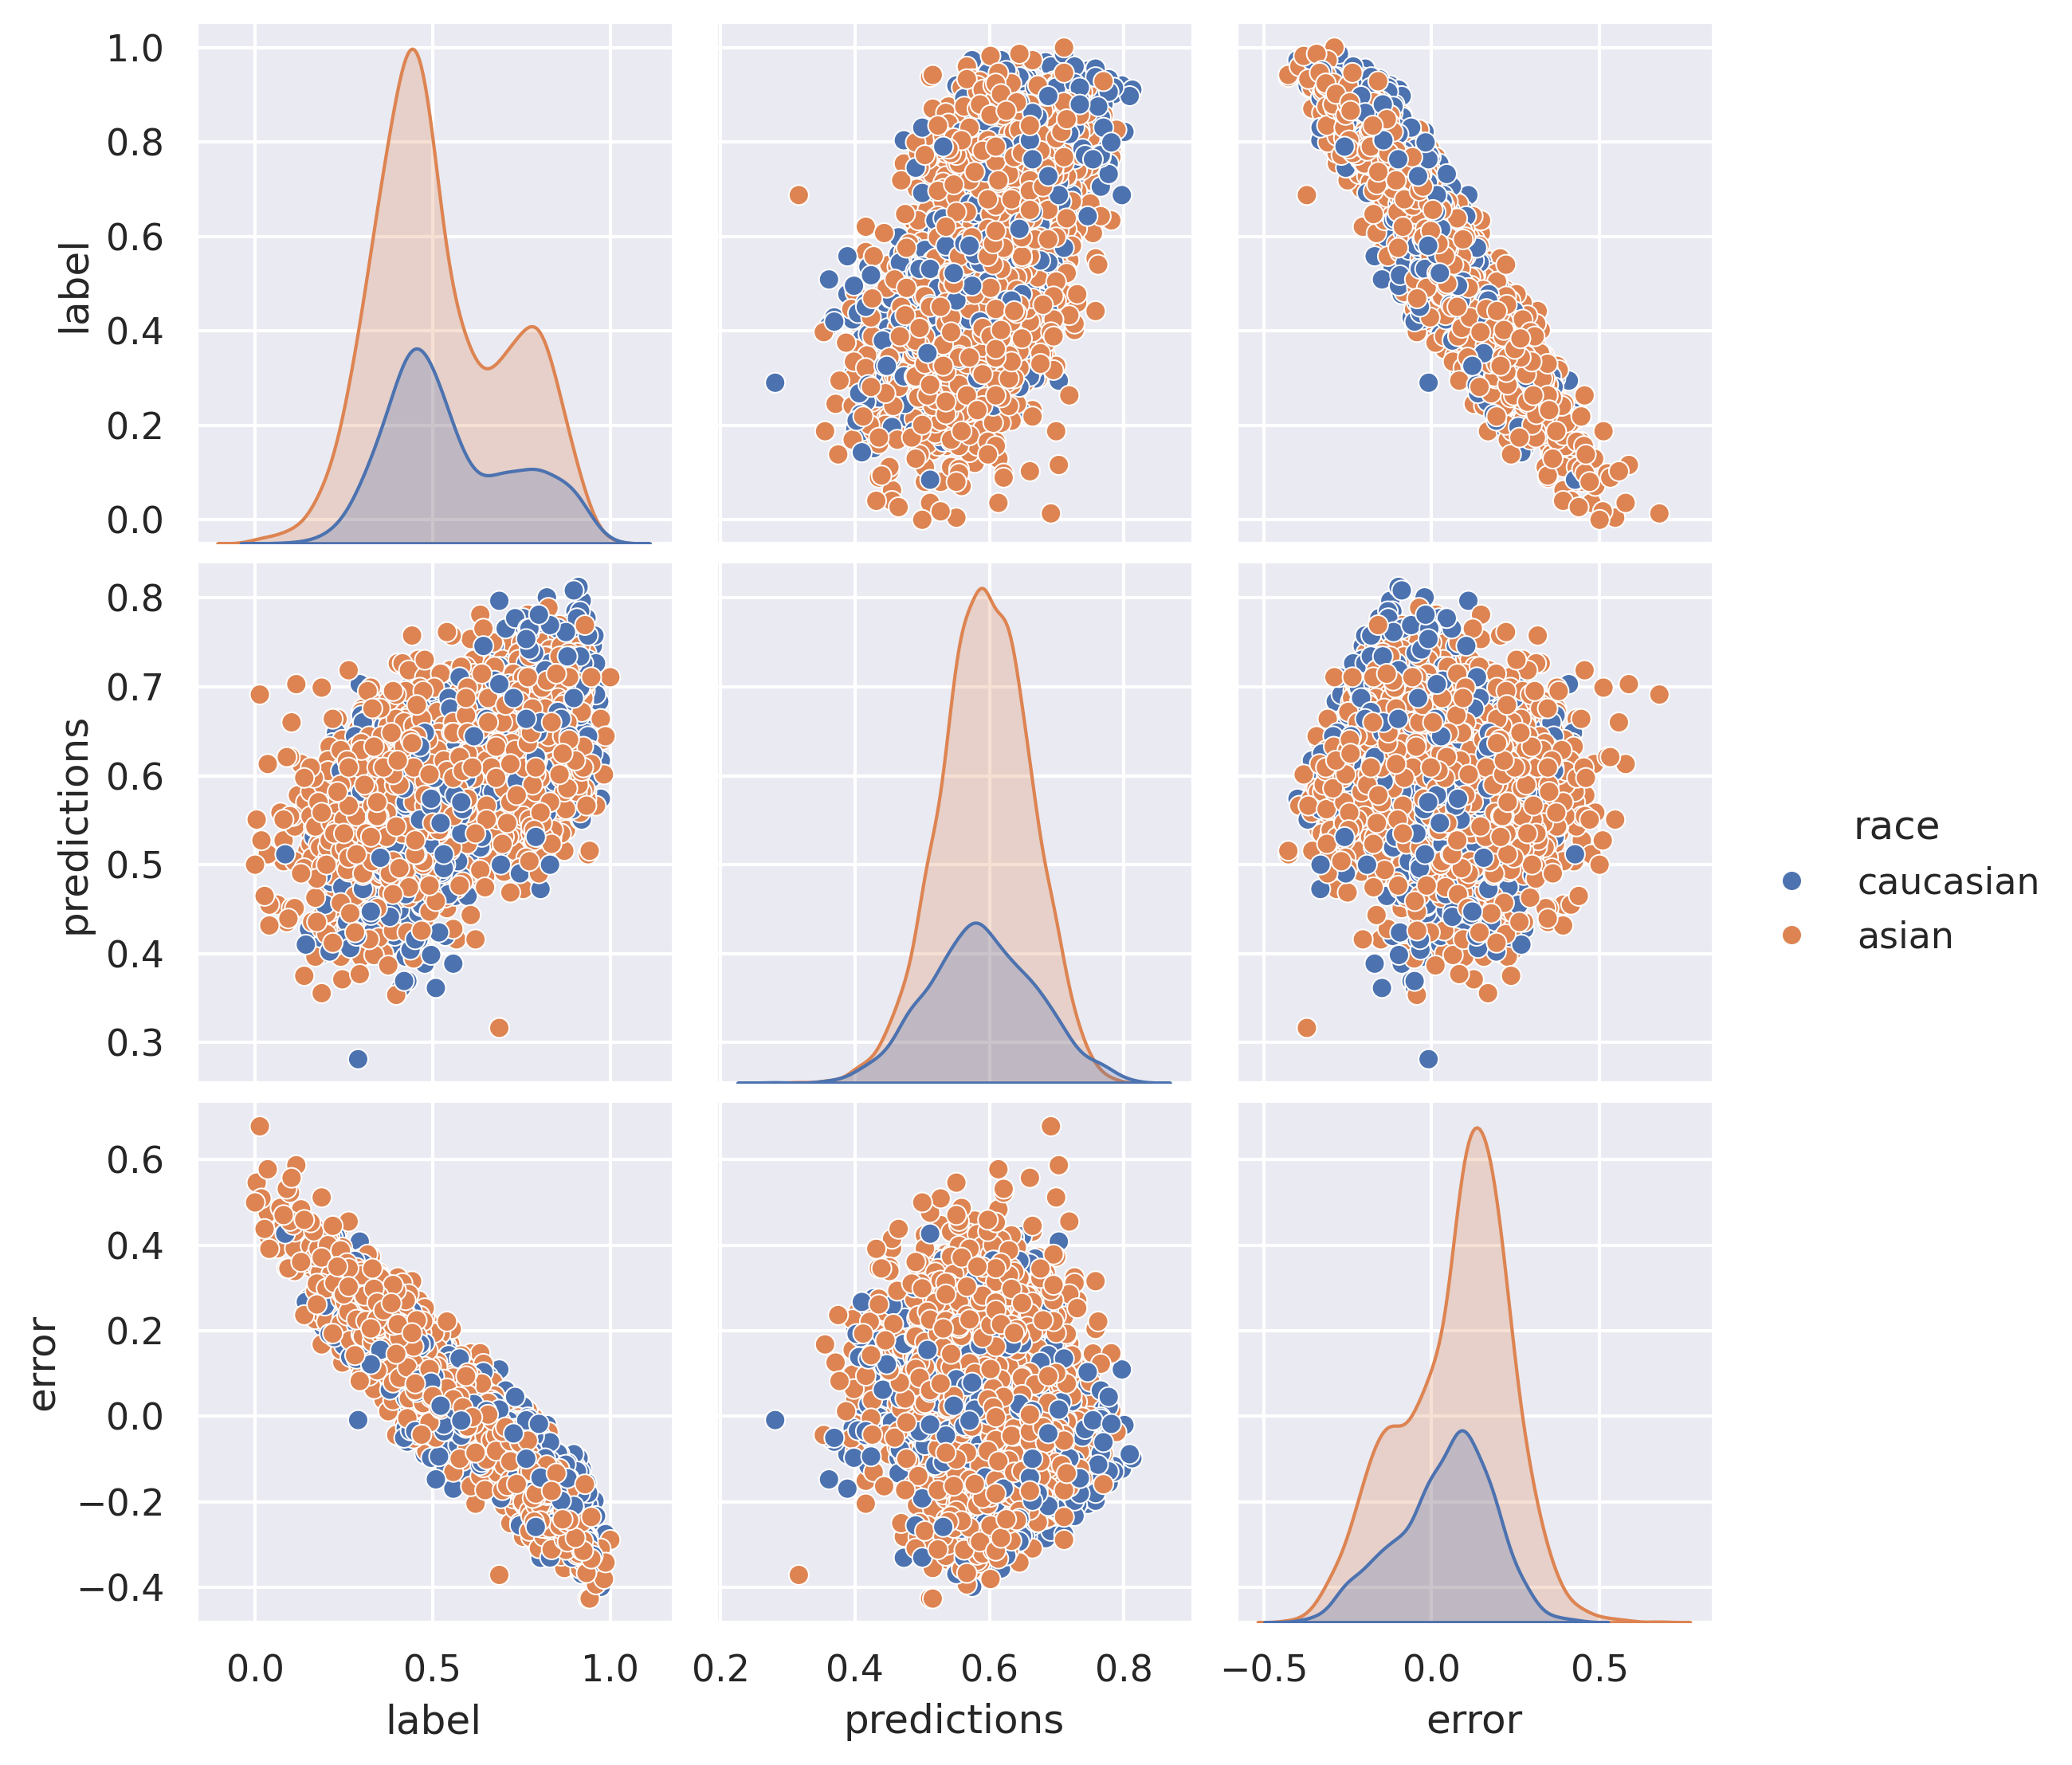

In [105]:
sns.pairplot(df, hue='race');

In [106]:
df['squarerror'] = df['error'] ** 2
df.squarerror.describe()

count    5.500000e+03
mean     2.820330e-02
std      3.352712e-02
min      1.751647e-15
25%      5.343995e-03
50%      1.749127e-02
75%      3.924466e-02
max      4.597022e-01
Name: squarerror, dtype: float64

In [107]:
df.groupby('race').describe().T

race                      asian     caucasian
label       count  4.000000e+03  1.500000e+03
            mean   5.207276e-01  5.503631e-01
            std    1.854708e-01  1.794885e-01
            min    0.000000e+00  8.482126e-02
            25%    3.883929e-01  4.241071e-01
            50%    4.821429e-01  5.044642e-01
            75%    6.651785e-01  6.886160e-01
            max    1.000000e+00  9.866071e-01
predictions count  4.000000e+03  1.500000e+03
            mean   5.929380e-01  5.883490e-01
            std    6.669069e-02  8.050756e-02
            min    3.164062e-01  2.812500e-01
            25%    5.507812e-01  5.351562e-01
            50%    5.937500e-01  5.859375e-01
            75%    6.406250e-01  6.445312e-01
            max    7.890625e-01  8.125000e-01
error       count  4.000000e+03  1.500000e+03
            mean   7.221035e-02  3.798590e-02
            std    1.596944e-01  1.417340e-01
            min   -4.263392e-01 -3.989955e-01
            25%   -3.585374e-02 -4.917693e-02
            50%    1.004465e-01  5.817527e-02
            75%    1.831056e-01  1.400669e-01
            max    6.780134e-01  4.268975e-01
squarerror  count  4.000000e+03  1.500000e+03
            mean   3.071026e-02  2.151805e-02
            std    3.571371e-02  2.567913e-02
            min    2.522372e-15  1.751647e-15
            25%    6.367905e-03  3.176627e-03
            50%    1.985402e-02  1.184114e-02
            75%    4.222897e-02  3.070316e-02
            max    4.597022e-01  1.822415e-01

# Error Analysis

In [108]:
white_df = df[df.race == 'caucasian']
asian_df = df[df.race == 'asian']
stats.shapiro(white_df['error'])

ShapiroResult(statistic=0.9842392805058887, pvalue=9.779285381824215e-12)

In [109]:
stats.shapiro(asian_df['error'])

ShapiroResult(statistic=0.9810884111328477, pvalue=1.0542357513783767e-22)

In [110]:
stats.levene(white_df['error'], asian_df['error'])

LeveneResult(statistic=20.69938318549103, pvalue=5.488902253524807e-06)

In [111]:
stats.ttest_ind(white_df['error'], asian_df['error'], equal_var=False)

TtestResult(statistic=-7.697611337984021, pvalue=1.8666564192754686e-14, df=3010.230313143653)

In [112]:
stats.mannwhitneyu(white_df['error'], asian_df['error'])

MannwhitneyuResult(statistic=2562921.5, pvalue=7.816035733289e-17)

In [113]:
stats.ks_2samp(white_df['error'], asian_df['error'])

KstestResult(statistic=0.146, pvalue=9.76473547219028e-21, statistic_location=0.09877228316326192, statistic_sign=1)

# Prediction Analysis

In [114]:
df['predictions'].describe()

count    5500.000000
mean        0.591686
std         0.070749
min         0.281250
25%         0.546875
50%         0.589844
75%         0.640625
max         0.812500
Name: predictions, dtype: float64

In [115]:
stats.shapiro(white_df['predictions'])

ShapiroResult(statistic=0.9981607418302156, pvalue=0.0962066929420846)

In [116]:
stats.shapiro(asian_df['predictions'])

ShapiroResult(statistic=0.9977545020038235, pvalue=1.4269890166931908e-05)

In [117]:
stats.levene(white_df['predictions'], asian_df['predictions'])

LeveneResult(statistic=74.60832813205727, pvalue=7.426173787549186e-18)

In [118]:
stats.ttest_ind(white_df['predictions'], asian_df['predictions'], equal_var=False)

TtestResult(statistic=-1.9688173682386783, pvalue=0.049093323011990465, df=2312.33720671207)

In [119]:
stats.mannwhitneyu(white_df['predictions'], asian_df['predictions'])

MannwhitneyuResult(statistic=2869019.0, pvalue=0.01249557937198744)

In [120]:
stats.ks_2samp(white_df['predictions'], asian_df['predictions'])

KstestResult(statistic=0.07016666666666667, pvalue=4.106182944730011e-05, statistic_location=0.5390625, statistic_sign=1)